In [10]:
pip install rarfile

In [11]:
!pip install --upgrade scikit-learn

In [44]:
import rarfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt





In [5]:
# Especifica el nombre del archivo RAR
rar_file_name = 'data3.rar'  # Reemplaza con el nombre correcto

try:
    # Intenta extraer los archivos del RAR en el directorio actual
    rar = rarfile.RarFile(rar_file_name)
    rar.extractall()

    # Elimina el archivo RAR después de la extracción
    os.remove(rar_file_name)

    print(f'El archivo {rar_file_name} ha sido eliminado con éxito y se ha extraído el contenido en la carpeta /data.')
except FileNotFoundError:
    # Si el archivo RAR no se encuentra, muestra un mensaje personalizado
    display(Markdown(f'<font color="red"><b>El archivo {rar_file_name} no se encuentra en el directorio actual o no puede ser eliminado.</b></font>'))

El archivo data3.rar ha sido eliminado con éxito y se ha extraído el contenido en la carpeta /data.


In [42]:


# Especifica la ruta del archivo CSV de predicciones
archivo_predicciones = 'predictions.csv'  # Reemplaza con la ubicación y nombre correctos de tu archivo

# Carga el archivo CSV en un DataFrame
df_predicciones = pd.read_csv(archivo_predicciones)

# Muestra las primeras filas del DataFrame
df_predicciones.head(15)


,Actual Sentiment,LR Test Predictions,LR Test Predictions Probabilities,MNB Test Predictions,MNB Test Predictions Probabilities
0,1,0,0.371422,0,0.368382
1,0,0,0.246416,0,0.251765
2,0,0,0.363526,0,0.423730
3,1,1,0.683135,1,0.652400
4,0,0,0.447053,0,0.449263
5,1,1,0.641453,1,0.635145
6,0,0,0.458747,0,0.411859
7,0,1,0.589448,1,0.632705
8,1,1,0.610438,1,0.582907
9,0,0,0.145487,0,0.150929


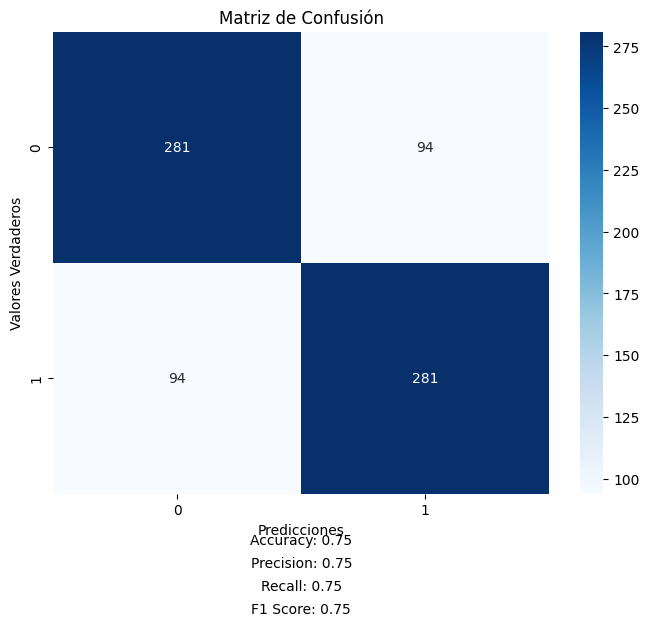

In [40]:

# Define las etiquetas verdaderas y las predicciones del modelo
y_true = df_predicciones['Actual Sentiment']
y_pred = df_predicciones['MNB Test Predictions']

# Calcula la matriz de confusión
confusion = confusion_matrix(y_true, y_pred)

# Calcula las métricas de precisión, exhaustividad y puntuación F1
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Crea un mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')

# Muestra las métricas en el gráfico
plt.text(0.5, -0.1, f'Accuracy: {accuracy:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.15, f'Precision: {precision:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.2, f'Recall: {recall:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.25, f'F1 Score: {f1:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()




In [41]:

# Define las etiquetas verdaderas y las predicciones del modelo
y_true = df_predicciones['Actual Sentiment']
y_pred = df_predicciones['MNB Test Predictions']

# Calcula la matriz de confusión
confusion = confusion_matrix(y_true, y_pred)

# Calcula las métricas de precisión, exhaustividad y puntuación F1
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Imprime la matriz de confusión y las métricas
print('Matriz de Confusión:')
print(confusion)
print('\nMétricas:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Matriz de Confusión:
[[281  94]
 [ 94 281]]

Métricas:
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75


In [25]:


# Extrae las etiquetas reales (Actual Sentiment) y las predicciones de MNB
y_actual = df_predicciones['Actual Sentiment']
y_pred_mnb = df_predicciones['MNB Test Predictions']

# Calcula el informe de clasificación
prediction_report = classification_report(y_actual, y_pred_mnb, target_names=['Clase 0', 'Clase 1'])

# Imprime el informe de clasificación
print(prediction_report)


              precision    recall  f1-score   support

     Clase 0       0.75      0.75      0.75       375
     Clase 1       0.75      0.75      0.75       375

    accuracy                           0.75       750
   macro avg       0.75      0.75      0.75       750
weighted avg       0.75      0.75      0.75       750



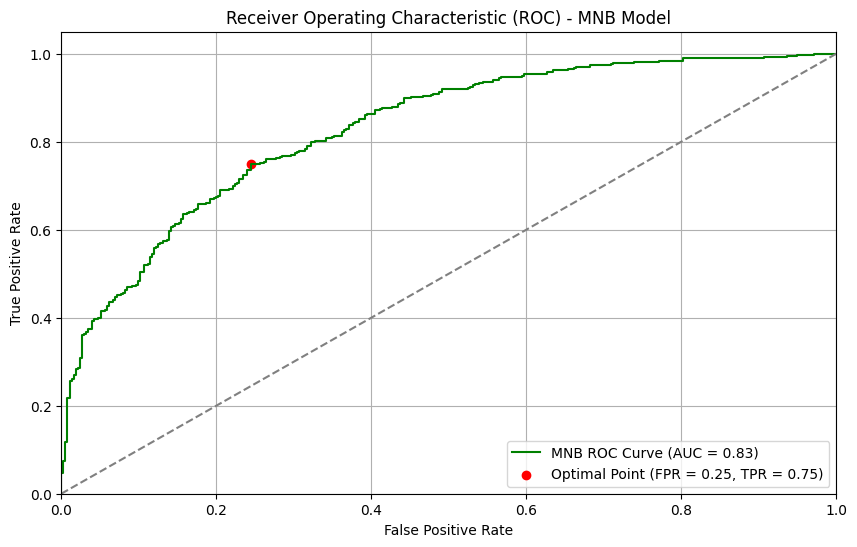

Optimal Threshold: 0.5006


In [38]:


# Calcular el AUC y la Curva ROC para MNB
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(df_predicciones['Actual Sentiment'], df_predicciones['MNB Test Predictions Probabilities'])
auc_mnb = roc_auc_score(df_predicciones['Actual Sentiment'], df_predicciones['MNB Test Predictions Probabilities'])

# Encontrar el umbral óptimo (el punto más cercano al punto (0,1))
optimal_idx = np.argmax(tpr_mnb - fpr_mnb)
optimal_threshold = thresholds_mnb[optimal_idx]

# Trazar la Curva ROC para MNB
plt.figure(figsize=(10, 6))
plt.plot(fpr_mnb, tpr_mnb, color='green', label='MNB ROC Curve (AUC = {:.2f})'.format(auc_mnb))
plt.scatter(fpr_mnb[optimal_idx], tpr_mnb[optimal_idx], color='red', marker='o', label='Optimal Point (FPR = {:.2f}, TPR = {:.2f})'.format(fpr_mnb[optimal_idx], tpr_mnb[optimal_idx]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - MNB Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Optimal Threshold: {:.4f}".format(optimal_threshold))





*   Es un poco sospechoso que todos los valores del report sean 0.75, quizás es por que las muestras están equilibradas de manera excesiva, ya que la matriz de confusión también muestra los mismos falsos positivos para ambos sentimientos, así que teoricamente funciona igual en ambos clusters.

*   En cuanto a la ROC Curve, un 0.83 indica que tiene buena capacidad para clasificar las muestras en función de las predicciones que genera (0.5 sería cercano a la aletoreidad y 1 sería perfecto)

*   Puesto que, por norma general, la partición de train da mejores resultados que la de test, sería una buena práctica probar con un número mayor de muestras y desequilibrar los clusters para ver como reacciona el modelo.

*   En cuanto al umbral del modelo, que se puede ver al pie del gráfico ROC, indica que, que el modelo considera que si la review tiene 0.5006 probabilidades de ser positiva, la pondrá como positiva, convendría probar diferentes Thresholds para ver como se comporta el modelo.









